Retention – один из самых важных показателей в компании. Ваша задача – написать функцию, которая будет считать retention игроков (по дням от даты регистрации игрока).
Функция должна быть написана на python. В ходе решения можно тестировать работу функции как на полном датасете, так и на части (сэмпле) данных.

In [ ]:
#импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')

In [2]:
#читаем файлы
reg_data = pd.read_csv('problem1-reg_data.csv', sep = ';')
auth_data = pd.read_csv('problem1-auth_data.csv', sep = ';')

In [3]:
reg_data.head()

,reg_ts,uid
0,911382223,1
1,932683089,2
2,947802447,3
3,959523541,4
4,969103313,5


In [4]:
auth_data.head()

,auth_ts,uid
0,911382223,1
1,932683089,2
2,932921206,2
3,933393015,2
4,933875379,2


In [5]:
reg_data.shape

(1000000, 2)

In [6]:
auth_data.shape

(9601013, 2)

In [7]:
reg_data.dtypes

reg_ts    int64
uid       int64
dtype: object

In [8]:
#объединяем датафреймы по uid
full_data = auth_data.merge(reg_data, how = 'left', on = 'uid')

In [9]:
full_data.head()

,auth_ts,uid,reg_ts
0,911382223,1,911382223
1,932683089,2,932683089
2,932921206,2,932683089
3,933393015,2,932683089
4,933875379,2,932683089


In [10]:
full_data.shape

(9601013, 3)

In [11]:
#переводим данные в нужный формат
full_data['reg_ts'] = full_data['reg_ts'].apply(datetime.fromtimestamp)
full_data['auth_ts'] = full_data['auth_ts'].apply(datetime.fromtimestamp)

In [12]:
full_data['reg_ts'] = pd.to_datetime(full_data['reg_ts'].dt.date)
full_data['auth_ts'] = pd.to_datetime(full_data['auth_ts'].dt.date)

In [13]:
full_data.head()

,auth_ts,uid,reg_ts
0,1998-11-18,1,1998-11-18
1,1999-07-23,2,1999-07-23
2,1999-07-25,2,1999-07-23
3,1999-07-31,2,1999-07-23
4,1999-08-05,2,1999-07-23


In [14]:
#функция для подсчета retention по дням, возвращает свобную таблицу и график heatmap
def retention_days(data, start, end):
    df = data.query('reg_ts >= @start and auth_ts <= @end') #фильтруем датасет по заданному диапазону дат
    df['delta'] = (df['auth_ts'] - df['reg_ts']).dt.days #колонка с разницей дней
    cohort = df.groupby(['reg_ts', 'delta'], as_index=False) \
               .agg({'uid':'nunique'}) \
               .pivot(index = 'reg_ts', columns = 'delta', values = 'uid') #создаем когорты
    retention = cohort.divide(cohort[0], axis = 0).iloc[:,1:].round(3) #считаем retention
    
    plt.figure(figsize=(20,15)) #строим график
    sns.heatmap(retention,
                annot = True, 
                xticklabels = retention.columns.astype('str'), 
                yticklabels = retention.index.astype('str'),  
                square = True, 
                fmt = '.1%', 
                cmap = 'PuOr')
    plt.title('Retention')
    plt.xlabel(' ')
    plt.ylabel(' ')
    plt.show()
    
    return retention

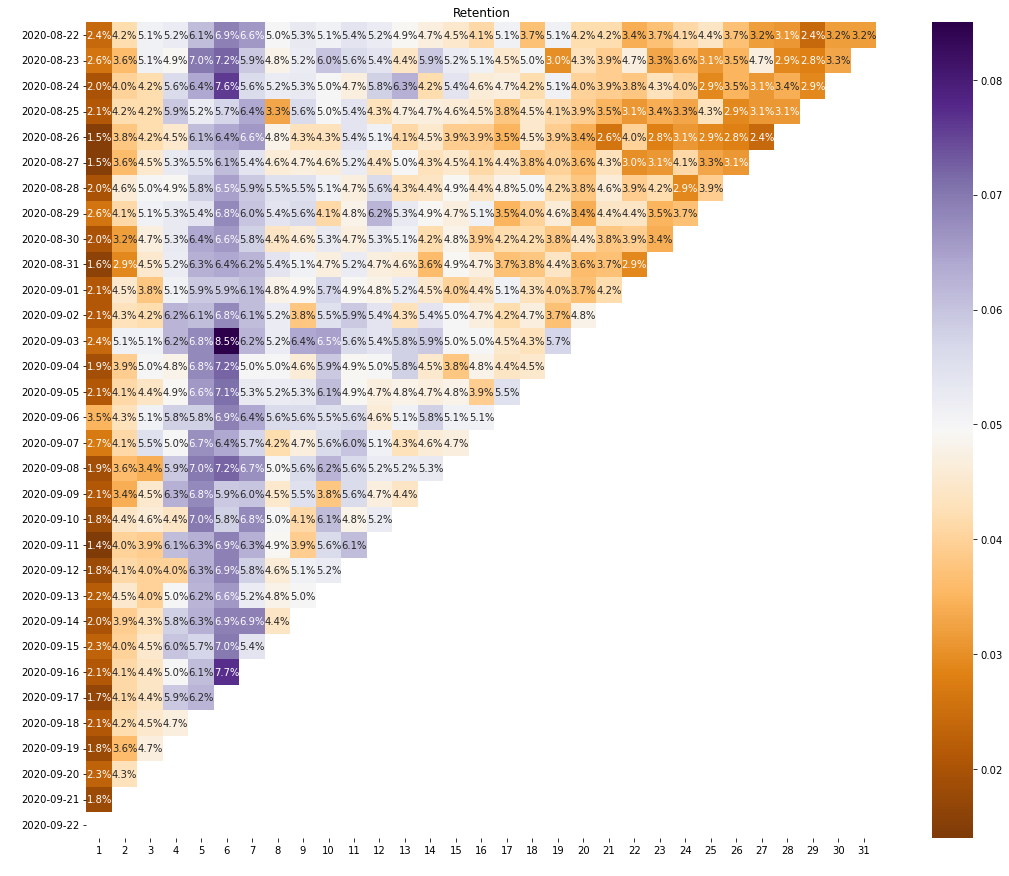

delta,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
reg_ts,,,,,,,,,,,,,,,,,,,,,
2020-08-22,0.024,0.042,0.051,0.052,0.061,0.069,0.066,0.050,0.053,0.051,...,0.034,0.037,0.041,0.044,0.037,0.032,0.031,0.024,0.032,0.032
2020-08-23,0.026,0.036,0.051,0.049,0.070,0.072,0.059,0.048,0.052,0.060,...,0.047,0.033,0.036,0.031,0.035,0.047,0.029,0.028,0.033,NaN
2020-08-24,0.020,0.040,0.042,0.056,0.064,0.076,0.056,0.052,0.053,0.050,...,0.038,0.043,0.040,0.029,0.035,0.031,0.034,0.029,NaN,NaN
2020-08-25,0.021,0.042,0.042,0.059,0.052,0.057,0.064,0.033,0.056,0.050,...,0.031,0.034,0.033,0.043,0.029,0.031,0.031,NaN,NaN,NaN
2020-08-26,0.015,0.038,0.042,0.045,0.061,0.064,0.066,0.048,0.043,0.043,...,0.040,0.028,0.031,0.029,0.028,0.024,NaN,NaN,NaN,NaN
2020-08-27,0.015,0.036,0.045,0.053,0.055,0.061,0.054,0.046,0.047,0.046,...,0.030,0.031,0.041,0.033,0.031,NaN,NaN,NaN,NaN,NaN
2020-08-28,0.020,0.046,0.050,0.049,0.058,0.065,0.059,0.055,0.055,0.051,...,0.039,0.042,0.029,0.039,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-29,0.026,0.041,0.051,0.053,0.054,0.068,0.060,0.054,0.056,0.041,...,0.044,0.035,0.037,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-30,0.020,0.032,0.047,0.053,0.064,0.066,0.058,0.044,0.046,0.053,...,0.039,0.034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
retention_days(full_data, '2020-08-22', '2020-09-22')